# Abstract

Enron Corporation was an American energy, commodities, and services company based in Houston, Texas. 
It was founded in 1985 as the result of a merger between Houston Natural Gas and InterNorth,
both relatively small regional companies in the U.S. 
Before its bankruptcy on December 2, 2001, Enron employed approximately 20,000 staff and was one of 
the world's major electricity, natural gas, communications and pulp and paper companies, 
with claimed revenues of nearly $101 billion during 2000. 
Fortune named Enron "America's Most Innovative Company" for six consecutive years.

Enron is also unique in that over 600,000 typically confidential emails from 158 employees were released after the bankruptcy. Detailed financial records of many executives were also released during the fraud trials.


### Project goal
For this project predictive models were built to identify the POIs (Person of Interest). 
POIs are people who are indicted, settled without admitting guilt or testified in exchange for immunity.
The financial and email data of enron employees are provided and will be used to create the predictive model
using scikit learn, numpy and pandas in python module.

### How machine learning can help ?
Machine learning techniques are very effective in automatically identifying various characteristics 
or features of the fraud effectively.

# Understanding the Dataset and Question
The aims of this part is to go through the process of exploratory data analysis (EDA).
It's an approach to analyzing data sets to summarize their main characteristics.
The main steps are Learning, cleaning and preparing the data.


In [1]:
import sys
sys.path.append("E:/ud120-projects/tools/")

import os
os.chdir('E:/ud120-projects/final_project/')


import pickle
from feature_format import featureFormat, targetFeatureSplit

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import pprint

%matplotlib inline

#loading the dataset
data_dict = pickle.load(open("final_project_dataset.pkl", "r") )

#define features

payment_features = ['salary',
                    'bonus',
                    'long_term_incentive',
                    'deferred_income',
                    'deferral_payments',
                    'loan_advances',
                    'other',
                    'expenses',                
                    'director_fees', 
                    'total_payments']

stock_features = ['exercised_stock_options',
                  'restricted_stock',
                  'restricted_stock_deferred',
                  'total_stock_value']

email_features = ['to_messages',
                  'from_messages',
                  'from_poi_to_this_person',
                  'from_this_person_to_poi',
                  'shared_receipt_with_poi']


financial_features = payment_features + stock_features
features_list = ['poi'] + financial_features + email_features

# Data Exploration

In [2]:
print "Nb of people: ", len (data_dict.keys())
print "Nb of features per person: ", len(list(data_dict.values())[0])
print "Nb of poi: ", sum([1 if x['poi'] else 0 for x in data_dict.values()])

Nb of people:  146
Nb of features per person:  21
Nb of poi:  18


In [3]:
#display keys
pprint.pprint (data_dict.keys())

['METTS MARK',
 'BAXTER JOHN C',
 'ELLIOTT STEVEN',
 'CORDES WILLIAM R',
 'HANNON KEVIN P',
 'MORDAUNT KRISTINA M',
 'MEYER ROCKFORD G',
 'MCMAHON JEFFREY',
 'HORTON STANLEY C',
 'PIPER GREGORY F',
 'HUMPHREY GENE E',
 'UMANOFF ADAM S',
 'BLACHMAN JEREMY M',
 'SUNDE MARTIN',
 'GIBBS DANA R',
 'LOWRY CHARLES P',
 'COLWELL WESLEY',
 'MULLER MARK S',
 'JACKSON CHARLENE R',
 'WESTFAHL RICHARD K',
 'WALTERS GARETH W',
 'WALLS JR ROBERT H',
 'KITCHEN LOUISE',
 'CHAN RONNIE',
 'BELFER ROBERT',
 'SHANKMAN JEFFREY A',
 'WODRASKA JOHN',
 'BERGSIEKER RICHARD P',
 'URQUHART JOHN A',
 'BIBI PHILIPPE A',
 'RIEKER PAULA H',
 'WHALEY DAVID A',
 'BECK SALLY W',
 'HAUG DAVID L',
 'ECHOLS JOHN B',
 'MENDELSOHN JOHN',
 'HICKERSON GARY J',
 'CLINE KENNETH W',
 'LEWIS RICHARD',
 'HAYES ROBERT E',
 'MCCARTY DANNY J',
 'KOPPER MICHAEL J',
 'LEFF DANIEL P',
 'LAVORATO JOHN J',
 'BERBERIAN DAVID',
 'DETMERING TIMOTHY J',
 'WAKEHAM JOHN',
 'POWERS WILLIAM',
 'GOLD JOSEPH',
 'BANNANTINE JAMES M',
 'DUNCAN JOHN H'

There are financial and email data of 146 people in total. 18 are identified as PoI. 
There are 21 features for each person.


# Data Cleansing

Now checking dataset quality for missing values, incorrect values, outliers, etc.

walking through the data dictionary keys, I found a key named 'TOTAL'.
It is a frequent in datasets and it has to be removed.
There's also a key named 'THE TRAVEL AGENCY IN THE PARK', that is clearly not an individual.
According to the documentation, it was a company co-owned by Enron's former Chairman's sister.
I will also removed it.

In [4]:
pd.set_option('display.float_format',lambda x:'%3f' % x)

#converting dict to dataFrame and remove items
df = pd.DataFrame.from_dict(data_dict, orient='index')
df = df[features_list]
df = df.replace('NaN', np.nan)

#Removing keys
df.drop(axis=0, labels=['TOTAL','THE TRAVEL AGENCY IN THE PARK'], inplace=True)

df.head(5)

,poi,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value,to_messages,from_messages,from_poi_to_this_person,from_this_person_to_poi,shared_receipt_with_poi
ALLEN PHILLIP K,False,201955.000000,4175000.000000,304805.000000,-3081055.000000,2869717.000000,nan,152.000000,13868.000000,nan,4484442.000000,1729541.000000,126027.000000,-126027.000000,1729541.000000,2902.000000,2195.000000,47.000000,65.000000,1407.000000
BADUM JAMES P,False,nan,nan,nan,nan,178980.000000,nan,nan,3486.000000,nan,182466.000000,257817.000000,nan,nan,257817.000000,nan,nan,nan,nan,nan
BANNANTINE JAMES M,False,477.000000,nan,nan,-5104.000000,nan,nan,864523.000000,56301.000000,nan,916197.000000,4046157.000000,1757552.000000,-560222.000000,5243487.000000,566.000000,29.000000,39.000000,0.000000,465.000000
BAXTER JOHN C,False,267102.000000,1200000.000000,1586055.000000,-1386055.000000,1295738.000000,nan,2660303.000000,11200.000000,nan,5634343.000000,6680544.000000,3942714.000000,nan,10623258.000000,nan,nan,nan,nan,nan
BAY FRANKLIN R,False,239671.000000,400000.000000,nan,-201641.000000,260455.000000,nan,69.000000,129142.000000,nan,827696.000000,nan,145796.000000,-82782.000000,63014.000000,nan,nan,nan,nan,nan


There is several missing value identified as NaN.
According to the official pdf documentation for the financial (payment and stock) data, 
values of NaN represent 0 and not unknown quantities.
for financial features I'll replace NaN by 0. For email features I'll replace NaN by the mean.

In [5]:
#replace NaN by 0 in financial dataframe
df[financial_features] = df[financial_features].fillna(0)

df[financial_features].describe()
#The summary indicate that many financial features have a large std

,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,185446.034722,675997.354167,336957.833333,-193683.270833,222089.555556,582812.500000,294745.534722,35375.340278,9980.319444,2256542.569444,2075801.979167,868536.291667,73417.902778,2909785.611111
std,197042.123807,1233155.255938,687182.567651,606011.135120,754101.302578,6794471.778940,1131325.452833,45309.303038,31300.575144,8847188.786691,4795513.145239,2016572.388715,1301983.390377,6189018.075043
min,0.000000,0.000000,0.000000,-3504386.000000,-102500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2604490.000000,-1787380.000000,-44093.000000
25%,0.000000,0.000000,0.000000,-37086.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90192.750000,0.000000,24345.000000,0.000000,244326.500000
50%,210596.000000,300000.000000,0.000000,0.000000,0.000000,0.000000,919.000000,20182.000000,0.000000,941359.500000,608293.500000,360528.000000,0.000000,965955.000000
75%,269667.500000,800000.000000,374586.250000,0.000000,8535.500000,0.000000,148577.000000,53328.250000,0.000000,1945668.250000,1683580.250000,737456.000000,0.000000,2295175.750000
max,1111258.000000,8000000.000000,5145434.000000,0.000000,6426990.000000,81525000.000000,10359729.000000,228763.000000,137864.000000,103559793.000000,34348384.000000,14761694.000000,15456290.000000,49110078.000000


In [6]:
#for email features I'll replace the NaN by the mean
from sklearn.preprocessing import Imputer
# Fill in the NaN email data with the mean
imp = Imputer(missing_values='NaN', strategy = 'mean', axis=0)

df[email_features]=imp.fit_transform(df[email_features])

df[email_features].describe()


,to_messages,from_messages,from_poi_to_this_person,from_this_person_to_poi,shared_receipt_with_poi
count,144.000000,144.000000,144.000000,144.000000,144.000000
mean,2073.860465,608.790698,64.895349,41.232558,1176.465116
std,1991.203154,1419.394903,67.059000,77.154071,908.455846
min,57.000000,12.000000,0.000000,0.000000,2.000000
25%,902.500000,35.500000,25.000000,5.750000,587.500000
50%,2073.860465,608.790698,64.895349,41.232558,1176.465116
75%,2073.860465,608.790698,64.895349,41.232558,1176.465116
max,15149.000000,14368.000000,528.000000,609.000000,5521.000000


For payment and stock feature we have a total, then I can check for any errors by summing values and compare it to totals.

In [7]:
#payment features
print df[df[payment_features[:-1]].sum(axis='columns') != df['total_payments']]

                    poi   salary    bonus  long_term_incentive  \
BELFER ROBERT     False 0.000000 0.000000             0.000000   
BHATNAGAR SANJAY  False 0.000000 0.000000             0.000000   

                  deferred_income  deferral_payments  loan_advances  \
BELFER ROBERT            0.000000     -102500.000000       0.000000   
BHATNAGAR SANJAY         0.000000           0.000000       0.000000   

                         other  expenses  director_fees  total_payments  \
BELFER ROBERT         0.000000  0.000000    3285.000000   102500.000000   
BHATNAGAR SANJAY 137864.000000  0.000000  137864.000000 15456290.000000   

                  exercised_stock_options  restricted_stock  \
BELFER ROBERT                 3285.000000          0.000000   
BHATNAGAR SANJAY           2604490.000000   -2604490.000000   

                  restricted_stock_deferred  total_stock_value  to_messages  \
BELFER ROBERT                  44093.000000      -44093.000000  2073.860465   
BHATNAGAR SAN

There is effectively 2 wrong data in the dataset. I'll check the values and correct if possible

In [8]:
# Display Belfer data
print df.ix['BELFER ROBERT', 1:15].tolist()

# Retrieve the incorrect data for Belfer
belfer_financial = df.ix['BELFER ROBERT', 1:15].tolist()

# Delete the first element to shift left and add on a 0 to end as indicated in financial data
belfer_financial.pop(0)
belfer_financial.append(0)

# Reinsert corrected data
df.ix['BELFER ROBERT', 1:15] = belfer_financial

# Display Belfer corrected data
print df.ix['BELFER ROBERT', 1:15].tolist()


[0.0, 0.0, 0.0, 0.0, -102500.0, 0.0, 0.0, 0.0, 3285.0, 102500.0, 3285.0, 0.0, 44093.0, -44093.0]
[0.0, 0.0, 0.0, -102500.0, 0.0, 0.0, 0.0, 3285.0, 102500.0, 3285.0, 0.0, 44093.0, -44093.0, 0.0]


In [9]:
# Display Bhatnagar data
print df.ix['BHATNAGAR SANJAY', 1:15].tolist()

# Retrieve the incorrect data for Bhatnagar
bhatnagar_financial = df.ix['BHATNAGAR SANJAY', 1:15].tolist()

# Delete the last element to shift right and add on a 0 to beginning
bhatnagar_financial.pop(-1)
bhatnagar_financial = [0] + bhatnagar_financial

# Reinsert corrected data
df.ix['BHATNAGAR SANJAY', 1:15] = bhatnagar_financial

# Display Bhatnagar corrected data
print df.ix['BHATNAGAR SANJAY', 1:15].tolist()

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 137864.0, 0.0, 137864.0, 15456290.0, 2604490.0, -2604490.0, 15456290.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 137864.0, 0.0, 137864.0, 15456290.0, 2604490.0, -2604490.0, 15456290.0]


In [10]:
# Check for any more errors
print len(df[df[payment_features[:-1]].sum(axis='columns') != df['total_payments']])


0


In [11]:
# Check for any errors with the stock features
print df[df[stock_features[:-1]].sum(axis='columns') != df['total_stock_value']]

Empty DataFrame
Columns: [poi, salary, bonus, long_term_incentive, deferred_income, deferral_payments, loan_advances, other, expenses, director_fees, total_payments, exercised_stock_options, restricted_stock, restricted_stock_deferred, total_stock_value, to_messages, from_messages, from_poi_to_this_person, from_this_person_to_poi, shared_receipt_with_poi]
Index: []


# Outlier Investigation

Once I've cleaned the data from missing values and typos. Now I would like to discover the outliers. 
Descriptive statistics determins outliers of the distibution as the values which are higher than Q2 + 1.5IQR or less than Q2 - 1.5IQR, where Q2 median of the distribution, IQR - interquartile range. 
The other possibility is to use the standard deviation outlier analysis.
It identifies values that are numerically distant from the rest of the data. 
The analysis is based on the standard normal distribution. I'll use this method with deviation around the median.

In [12]:
#calculate the std of each features
std=df[['poi']+financial_features].apply(lambda x: np.abs(x-x.median()) / x.std())
std=pd.DataFrame(std)
std.describe()


,poi,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,0.376650,0.725170,0.529376,0.490347,0.320867,0.295555,0.085777,0.259541,0.728386,0.319235,0.217083,0.417547,0.401745,0.192605,0.427047
std,1.000000,0.697751,0.900788,1.000000,1.000000,1.000000,1.000000,0.999822,0.751479,1.000000,0.986151,0.961829,0.954821,1.000000,0.960509
min,0.000000,0.000487,0.000000,0.000000,0.000000,0.000000,0.000000,0.000008,0.008850,0.000000,0.000270,0.000093,0.000725,0.000000,0.000717
25%,0.000000,0.241498,0.243278,0.000000,0.000000,0.000000,0.000000,0.000780,0.401372,0.000000,0.045517,0.085904,0.076533,0.000000,0.077497
50%,0.000000,0.669844,0.243278,0.000000,0.000000,0.000000,0.000000,0.000780,0.476991,0.000000,0.095111,0.123554,0.168271,0.000000,0.140824
75%,0.000000,1.068787,0.405464,0.545104,0.064492,0.011323,0.000000,0.130528,0.702266,0.000000,0.110638,0.218407,0.247518,0.000000,0.221982
max,3.013198,4.570911,6.244145,7.487725,5.784321,8.525656,11.998725,9.154827,4.497154,4.109914,11.691731,6.853117,7.198574,9.533849,7.674293


The result shows that most features have large outliers (> 3 std)
I found manualy a relevant level to not remove too many people. I'll use  >6

In [13]:
outliers=std.apply(lambda x: x>6).any(axis=1)
df_outlier= pd.DataFrame(index=df[outliers].index)

# Display poi, feature and feature_std
for x in df[['poi']+financial_features].columns:
    df_outlier[str((x,x+'_std'))]=list(zip(df[outliers][x],std[outliers][x]))
    
df_outlier


,"('poi', 'poi_std')","('salary', 'salary_std')","('bonus', 'bonus_std')","('long_term_incentive', 'long_term_incentive_std')","('deferred_income', 'deferred_income_std')","('deferral_payments', 'deferral_payments_std')","('loan_advances', 'loan_advances_std')","('other', 'other_std')","('expenses', 'expenses_std')","('director_fees', 'director_fees_std')","('total_payments', 'total_payments_std')","('exercised_stock_options', 'exercised_stock_options_std')","('restricted_stock', 'restricted_stock_std')","('restricted_stock_deferred', 'restricted_stock_deferred_std')","('total_stock_value', 'total_stock_value_std')"
BHATNAGAR SANJAY,"(False, 0.0)","(0.0, 1.06878669358)","(0.0, 0.243278369496)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.000779926099895)","(137864.0, 2.52067728443)","(0.0, 0.0)","(137864.0, 0.0883846444578)","(15456290.0, 3.01585035234)","(2604490.0, 1.12105608456)","(-2604490.0, 9.53384902645)","(15456290.0, 2.30817045134)"
DERRICK JR. JAMES V,"(False, 0.0)","(492375.0, 1.4300444725)","(800000.0, 0.40546394916)","(484000.0, 0.704325200877)","(-1284000.0, 2.11936367768)","(0.0, 0.0)","(0.0, 0.0)","(7482.0, 0.00583243319689)","(51124.0, 0.634632207342)","(0.0, 0.0)","(550981.0, 0.0413291878505)","(8831913.0, 1.67034022177)","(1787380.0, 0.712573928277)","(-1787380.0, 6.54278230014)","(8831913.0, 1.25190839649)"
FREVERT MARK A,"(False, 0.0)","(1060932.0, 4.3155036272)","(2000000.0, 1.37857742714)","(1617011.0, 2.35310247396)","(-3367011.0, 5.55757072878)","(6426990.0, 8.52565606219)","(2000000.0, 0.294356951515)","(7427621.0, 6.56352089886)","(86987.0, 1.41442508951)","(0.0, 0.0)","(17252530.0, 1.8610350679)","(10433518.0, 1.99565017207)","(4188667.0, 1.91300335837)","(0.0, 0.0)","(14622185.0, 2.17517176162)"
HIRKO JOSEPH,"(True, 3.01319847992)","(0.0, 1.06878669358)","(0.0, 0.243278369496)","(0.0, 0.0)","(0.0, 0.0)","(10259.0, 0.0136089686684)","(0.0, 0.0)","(2856.0, 0.00174411802622)","(77978.0, 1.21853645567)","(0.0, 0.0)","(91093.0, 0.0937120232899)","(30766064.0, 6.12549462739)","(0.0, 0.180956730389)","(0.0, 0.0)","(30766064.0, 4.74932579992)"
LAVORATO JOHN J,"(False, 0.0)","(339288.0, 0.653119229095)","(8000000.0, 6.24414481706)","(2035380.0, 2.96192030447)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(1552.0, 0.000591683313178)","(49537.0, 0.600125018763)","(0.0, 0.0)","(10425757.0, 1.08344198733)","(4158995.0, 0.721200625946)","(1008149.0, 0.323027895154)","(0.0, 0.0)","(5167144.0, 0.667558134649)"
LAY KENNETH L,"(True, 3.01319847992)","(1072321.0, 4.37330345081)","(7000000.0, 5.43321691874)","(3600000.0, 5.23878248586)","(-300000.0, 0.495178429365)","(202911.0, 0.269169455256)","(81525000.0, 11.9987252361)","(10359729.0, 9.15482691236)","(99832.0, 1.6937224035)","(0.0, 0.0)","(103559793.0, 11.6917311395)","(34348384.0, 6.85311744399)","(14761694.0, 7.19857429426)","(0.0, 0.0)","(49110078.0, 7.67429307185)"
MARTIN AMANDA K,"(False, 0.0)","(349487.0, 0.704879734935)","(0.0, 0.243278369496)","(5145434.0, 7.48772486704)","(0.0, 0.0)","(85430.0, 0.113326268968)","(0.0, 0.0)","(2818454.0, 2.49008221096)","(8211.0, 0.298453478534)","(0.0, 0.0)","(8407016.0, 0.853500398073)","(2070306.0, 0.296956623963)","(0.0, 0.180956730389)","(0.0, 0.0)","(2070306.0, 0.173764911615)"
WHITE JR THOMAS E,"(False, 0.0)","(317543.0, 0.542762115703)","(450000.0, 0.121639184748)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(1085463.0, 0.958518571543)","(81353.0, 1.29192130851)","(0.0, 0.0)","(1934359.0, 0.116242355927)","(1297049.0, 0.139896552195)","(13847074.0, 6.7413458308)","(0.0, 0.0)","(15144123.0, 2.25839518087)"


Height people are identified as outliers. two of them are person of interest.
Joseph Hirko, former co-chief executive officer of Enron Broadband Services (EBS) and Kenneth Lay, the CEO of Enron from 1986-2001.  
I'll keep them and remove the six others from the dataset.
I believe these removals are justified primarily because none of these individuals were persons of interest 

In [14]:
#Removing outliers
df.drop(axis=0, labels=['BHATNAGAR SANJAY',
                        'DERRICK JR. JAMES V',
                        'FREVERT MARK A',
                        'LAVORATO JOHN J',
                        'MARTIN AMANDA K',
                        'WHITE JR THOMAS E'], inplace=True)


# Optimize Feature Selection/Engineering
I'll first analyze features correlation with poi

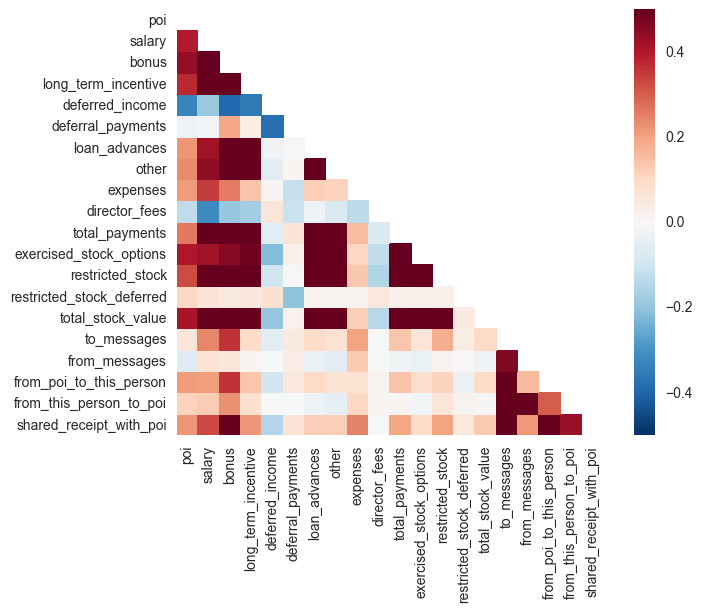

In [15]:
# Check features correlation with poi
import seaborn as sns
corr=df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
     ax = sns.heatmap(corr, mask=mask, vmax=.5, square=True)
#sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)


I can see some correlated features with POI. 
email features seems not strongly correlated.
I'll select those which are more than .3 to create new financial features.
For email features I'll create some ratio

In [16]:
#print corr['poi']
select=abs(corr['poi'])>=0.3
print corr['poi'][select]


poi                        1.000000
salary                     0.398208
bonus                      0.438060
long_term_incentive        0.376818
deferred_income           -0.329391
exercised_stock_options    0.406158
restricted_stock           0.327284
total_stock_value          0.410223
Name: poi, dtype: float64


In [17]:
# Create the new financial features and add to the dataframe
df['money_total'] =  df['salary'] + df['bonus'] - df['expenses']
df['stock_total'] = df['total_stock_value']+df['exercised_stock_options'] + df['restricted_stock']
df['bonus_to_salary'] = df['bonus'] / df['salary']
df['bonus_to_total'] = df['bonus'] / df['total_payments']   

features_list.append('money_total')
features_list.append('stock_total')
features_list.append('bonus_to_salary')
features_list.append('bonus_to_total')  

# Create the new email features
df['to_poi_ratio'] = df['from_poi_to_this_person'] / df['to_messages']
df['from_poi_ratio'] = df['from_this_person_to_poi'] / df['from_messages']
df['shared_poi_ratio'] = df['shared_receipt_with_poi'] / df['to_messages']

features_list.append('to_poi_ratio')
features_list.append('from_poi_ratio')
features_list.append('shared_poi_ratio')

# Fill any NaN data with the mean if any
df=df.fillna(df.mean(),inplace=True)

In [18]:
corr_with_new_features=df.corr()
select=abs(corr_with_new_features['poi'])>=0.3
print corr_with_new_features['poi'][select]

poi                        1.000000
salary                     0.398208
bonus                      0.438060
long_term_incentive        0.376818
deferred_income           -0.329391
exercised_stock_options    0.406158
restricted_stock           0.327284
total_stock_value          0.410223
money_total                0.443064
stock_total                0.409610
bonus_to_total             0.339120
from_poi_ratio             0.322460
Name: poi, dtype: float64


These new features improve the number of features coorelated to PoI with an email feature 'from_poi_ratio' upper the 0.3. 

# Intelligently Select Features

Leaving some features behind has some advantages, like reducing
the noise in the classification, and saving processing time, since
there are less features to compute.
I'll score them using sklearn.feature_selection  SelectKBest to get an ordering of them.
I'll also scale the dtatset using sklearn.preprocessing scale
I'll test all with multiple algorithms afterward


In [19]:
#Scoring with SelectKbest
poi=df['poi']
from sklearn.feature_selection import SelectKBest
selector=SelectKBest()
selector.fit(df,poi.tolist())
scores={df.columns[i]:selector.scores_[i] for i in range(len(df.columns))}
sorted_features=sorted(scores,key=scores.get,reverse=True)

#Printing sorted features
for feature in sorted_features:
    print 'feature %s has value %f'%(feature,scores[feature])    

feature poi has value inf
feature money_total has value 33.218581
feature bonus has value 32.295293
feature total_stock_value has value 27.517110
feature stock_total has value 27.418369
feature exercised_stock_options has value 26.867332
feature salary has value 25.629520
feature long_term_incentive has value 22.506585
feature bonus_to_total has value 17.672687
feature deferred_income has value 16.551563
feature restricted_stock has value 16.315164
feature from_poi_ratio has value 15.782372
feature total_payments has value 10.028853
feature shared_poi_ratio has value 9.074555
feature other has value 8.031872
feature bonus_to_salary has value 8.025309
feature loan_advances has value 6.946110
feature shared_receipt_with_poi has value 6.883207
feature from_poi_to_this_person has value 6.545553
feature expenses has value 6.411690
feature director_fees has value 2.230315
feature from_this_person_to_poi has value 1.860085
feature to_poi_ratio has value 1.558628
feature restricted_stock_defer

for my features, I'll keep all feature with a score upper than 10 

In [20]:
my_feature_list = sorted_features[:13]
my_feature_list

from sklearn.preprocessing import scale

#Scaling the dataset and send it back to a dictionary
scaled_df = df[my_feature_list]
scaled_df.ix[:,1:] = scale(scaled_df.ix[:,1:])
my_dataset = scaled_df.to_dict(orient='index')

C:\Tools\AH-Applications\Anaconda2\lib\site-packages\pandas\core\indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [21]:
#loading sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import AdaBoostClassifier

import tester


C:\Tools\AH-Applications\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [22]:
# Create and test the Gaussian Naive Bayes Classifier
clf_nb = GaussianNB()
tester.dump_classifier_and_data(clf_nb, my_dataset, my_feature_list)
tester.main()

GaussianNB(priors=None)
	Accuracy: 0.87821	Precision: 0.58988	Recall: 0.48400	F1: 0.53172	F2: 0.50202
	Total predictions: 14000	True positives:  968	False positives:  673	False negatives: 1032	True negatives: 11327



In [23]:
# Create and test the Decision Tree Classifier
clf_DTree = DecisionTreeClassifier()
tester.dump_classifier_and_data(clf_DTree, my_dataset, my_feature_list)
tester.main()


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
	Accuracy: 0.82907	Precision: 0.40041	Recall: 0.39500	F1: 0.39768	F2: 0.39607
	Total predictions: 14000	True positives:  790	False positives: 1183	False negatives: 1210	True negatives: 10817



In [24]:
# Create and test the  Random Forest Classifier
clf_RForest = RandomForestClassifier()
tester.dump_classifier_and_data(clf_RForest, my_dataset, my_feature_list)
tester.main()


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
	Accuracy: 0.86543	Precision: 0.57125	Recall: 0.23250	F1: 0.33049	F2: 0.26378
	Total predictions: 14000	True positives:  465	False positives:  349	False negatives: 1535	True negatives: 11651



In [25]:
# Create and test the Support Vector Classifier
clf_SVC = SVC(kernel='linear')
tester.dump_classifier_and_data(clf_SVC, my_dataset, my_feature_list)
tester.main()

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
	Accuracy: 0.86843	Precision: 0.68458	Recall: 0.14650	F1: 0.24135	F2: 0.17383
	Total predictions: 14000	True positives:  293	False positives:  135	False negatives: 1707	True negatives: 11865



In [26]:
# Create and test the K Means clustering classifier
clf_KMeans = KMeans(n_clusters=2)
tester.dump_classifier_and_data(clf_KMeans, my_dataset, my_feature_list)
tester.main()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
	Accuracy: 0.74750	Precision: 0.15475	Recall: 0.17200	F1: 0.16292	F2: 0.16825
	Total predictions: 14000	True positives:  344	False positives: 1879	False negatives: 1656	True negatives: 10121



In [27]:
clf_AdaBoost = AdaBoostClassifier()
tester.dump_classifier_and_data(clf_AdaBoost, my_dataset, my_feature_list)
tester.main()

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)
	Accuracy: 0.84036	Precision: 0.41902	Recall: 0.30400	F1: 0.35236	F2: 0.32166
	Total predictions: 14000	True positives:  608	False positives:  843	False negatives: 1392	True negatives: 11157



In [28]:
pd.DataFrame([[0.87821,0.58988,0.484,0.53172],
              [0.82986,0.40573,0.411,0.40835],
              [0.86343,0.55528,0.221,0.31617],
              [0.86843,0.68458,0.1465,0.24135],
              [0.74557,0.16452,0.1915,0.17699],
              [0.84064,0.4204,0.305,0.35352]
             ],
             columns = ['Accuracy','Precision', 'Recall', 'F1'], 
             index = ['Gaussian Naive Bayes','Decision Tree', 'Random Forest','Support Vector','KMeans','AdaBoost' ])


,Accuracy,Precision,Recall,F1
Gaussian Naive Bayes,0.878210,0.589880,0.484000,0.531720
Decision Tree,0.829860,0.405730,0.411000,0.408350
Random Forest,0.863430,0.555280,0.221000,0.316170
Support Vector,0.868430,0.684580,0.146500,0.241350
KMeans,0.745570,0.164520,0.191500,0.176990
AdaBoost,0.840640,0.420400,0.305000,0.353520


Above, the results from running these classifiers on the selected features set with no parameter tuning.
I can see that to meet the standards for the project (precision and recall are both at least 0.3) the algorythms matching without tuning are Gaussian Naive Bayes, Decision Tree and AdaBoost. 
For next step, I will only keep these ones.

In [29]:
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, precision_score, recall_score, accuracy_score


I found from http://www.ritchieng.com/, method to evaluate classification model, which is the Area Under The Curve and Receiver Operating Characteristic.

I'll use it referring to the high class imbalance, as the total number of a class of data (positive) (PoI) 
is far less than the total number of the other class of data (negative)

    AUC is useful as a single number summary of classifier performance
    Higher value = better classifier
    If you randomly chose one positive and one negative observation, 
    AUC represents the likelihood that your classifier will assign a higher predicted probability
    to the positive observation
    AUC is useful even when there is high class imbalance (unlike classification accuracy)
    Fraud case
        Null accuracy almost 99%
        AUC is useful here



In [30]:
#Function to plot ROC and get the AUC

def plt_ROC(clf):
    #fit the classifier
    clf.fit(features_train, labels_train)
    # calculate the fpr and tpr for all thresholds of the classification
    probs = clf.predict_proba(features_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(labels_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    
    
    plt.title('Receiver Operating Characteristic for %r' % clf)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

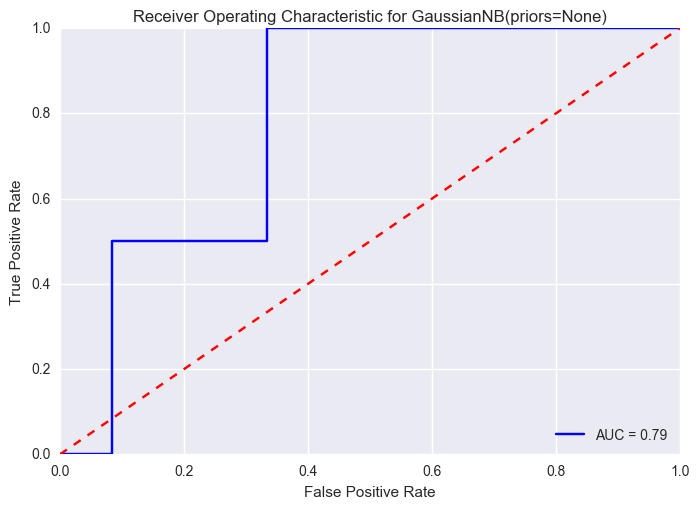

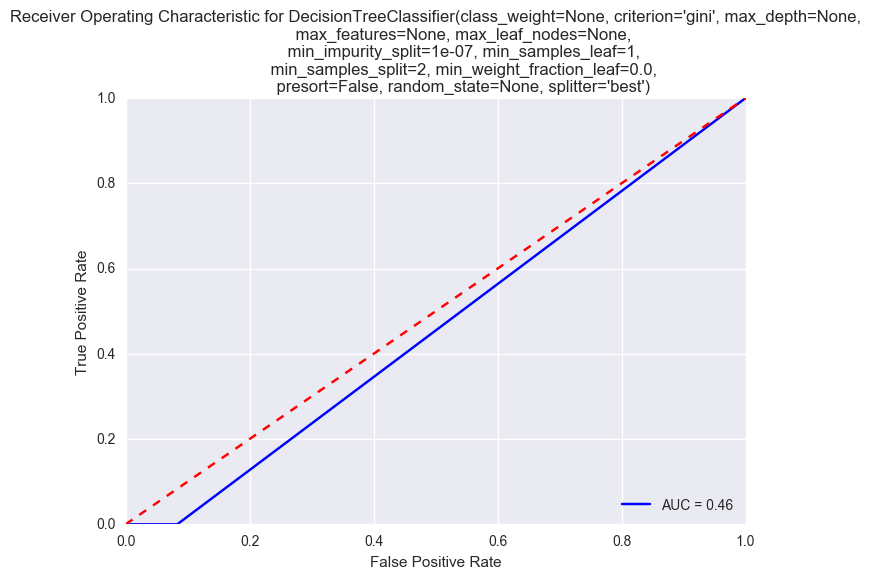

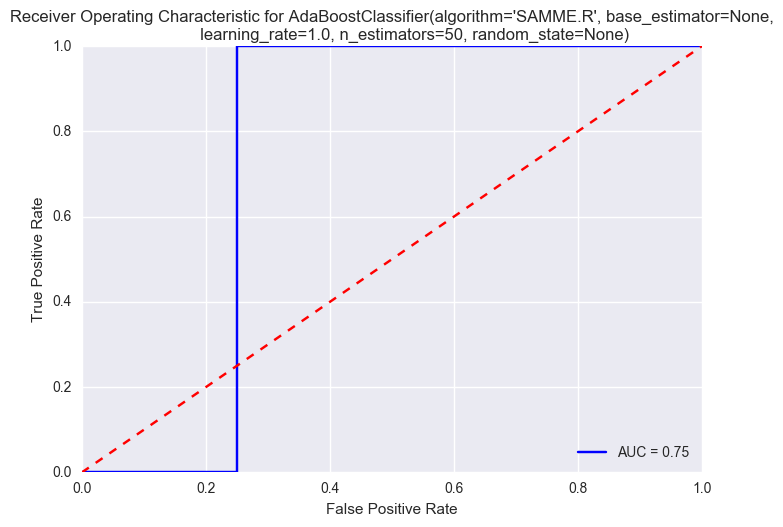

In [31]:
#The Selected Classifier without tuning
clfs = [clf_nb,clf_DTree,clf_AdaBoost]

data = featureFormat(my_dataset, my_feature_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

cv = StratifiedShuffleSplit(labels, 1000, random_state = 42)
for train_idx, test_idx in cv: 
        features_train = []
        features_test  = []
        labels_train   = []
        labels_test    = []
        for ii in train_idx:
            features_train.append( features[ii] )
            labels_train.append( labels[ii] )
        for jj in test_idx:
            features_test.append( features[jj] )
            labels_test.append( labels[jj] )

#Plotting the ROC
for clf in clfs:
    plt_ROC(clf)

I can see that Decision Tree is failed due to a bad AUC. I'll tune the parameters

In [32]:

# Set the parameters 
DTtuned_parameters = [{'criterion':['gini','entropy'],
                       'max_depth':[1,3,5,7,9,10,20,30],
                       'min_samples_leaf':[1,3,5,7,9,10,20,30]
                       }]



# Tuning hyper-parameters for precision
()
Detailed classification report:
             precision    recall  f1-score   support

        0.0       0.85      0.92      0.88        12
        1.0       0.00      0.00      0.00         2

avg / total       0.73      0.79      0.75        14

Best parameters:  {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1}
Best scores 0.887096774194
Plot the ROC


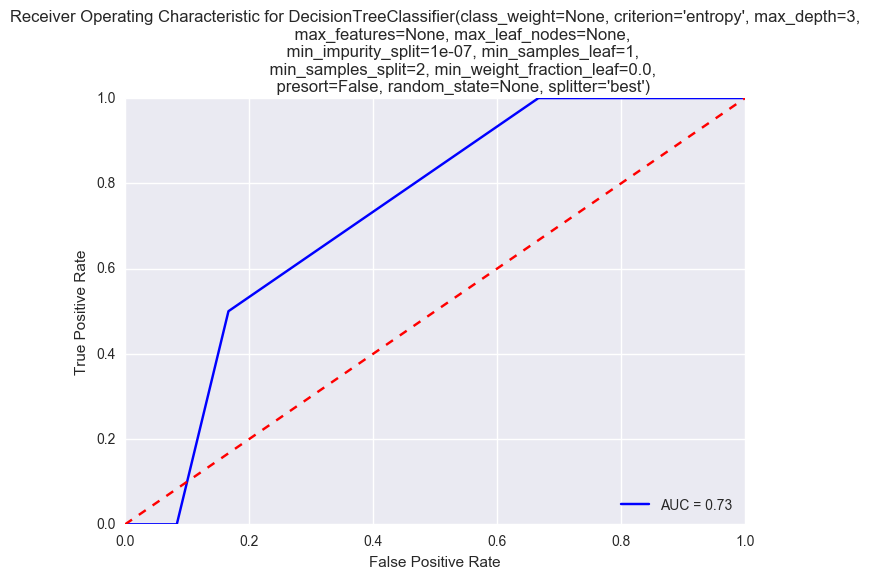

# Tuning hyper-parameters for recall
()
Detailed classification report:
             precision    recall  f1-score   support

        0.0       0.85      0.92      0.88        12
        1.0       0.00      0.00      0.00         2

avg / total       0.73      0.79      0.75        14

Best parameters:  {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1}
Best scores 0.895161290323
Plot the ROC


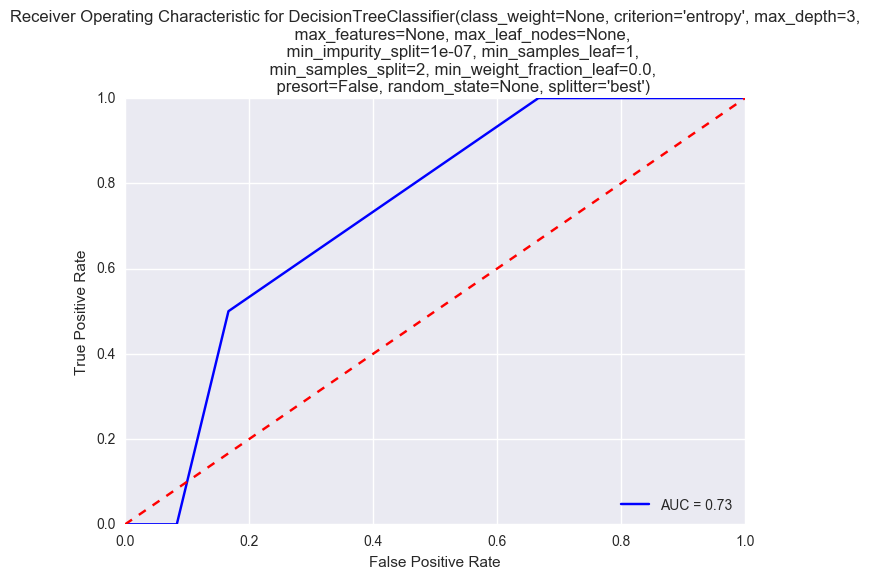

# Tuning hyper-parameters for f1
()
Detailed classification report:
             precision    recall  f1-score   support

        0.0       0.85      0.92      0.88        12
        1.0       0.00      0.00      0.00         2

avg / total       0.73      0.79      0.75        14

Best parameters:  {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 3}
Best scores 0.895161290323
Plot the ROC


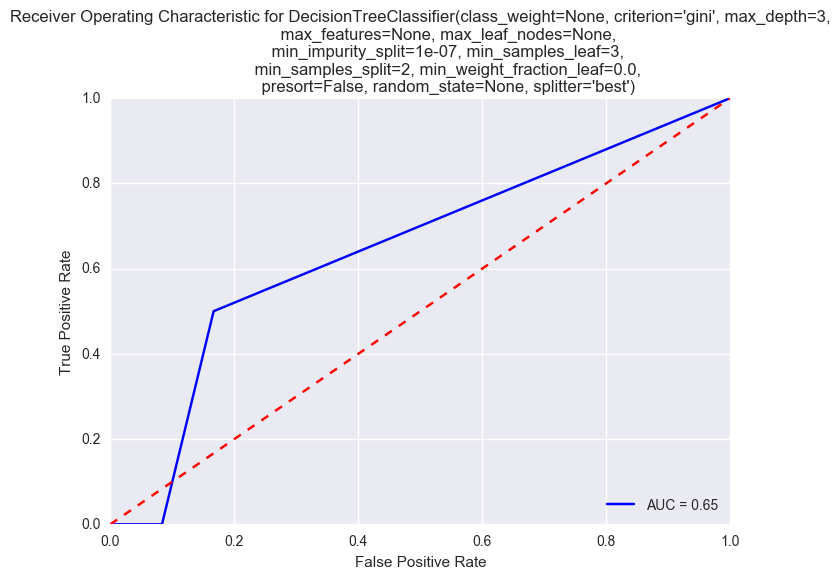

In [33]:
#Define scores                     
scores = ['precision', 'recall','f1']

#Get best parameters and scores
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(DecisionTreeClassifier(), DTtuned_parameters, cv=5,
                       scoring='%s_micro' % score)
 
    clf.fit(features_train, labels_train)
 
    print "Detailed classification report:"

    y_true, y_pred = labels_test, clf.predict(features_test)
    print classification_report(y_true, y_pred)
    
    print "Best parameters: ",clf.best_params_
    print "Best scores", clf.best_score_
  
    print "Plot the ROC"
    plt_ROC(DecisionTreeClassifier(**clf.best_params_))
   

With the following values I have an AUC to 0.92
    Best parameters:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 7}
    Best scores 0.887096774194
I'll Test it with tester
    

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=7,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
	Accuracy: 0.85621	Precision: 0.49525	Recall: 0.33900	F1: 0.40249	F2: 0.36183
	Total predictions: 14000	True positives:  678	False positives:  691	False negatives: 1322	True negatives: 11309



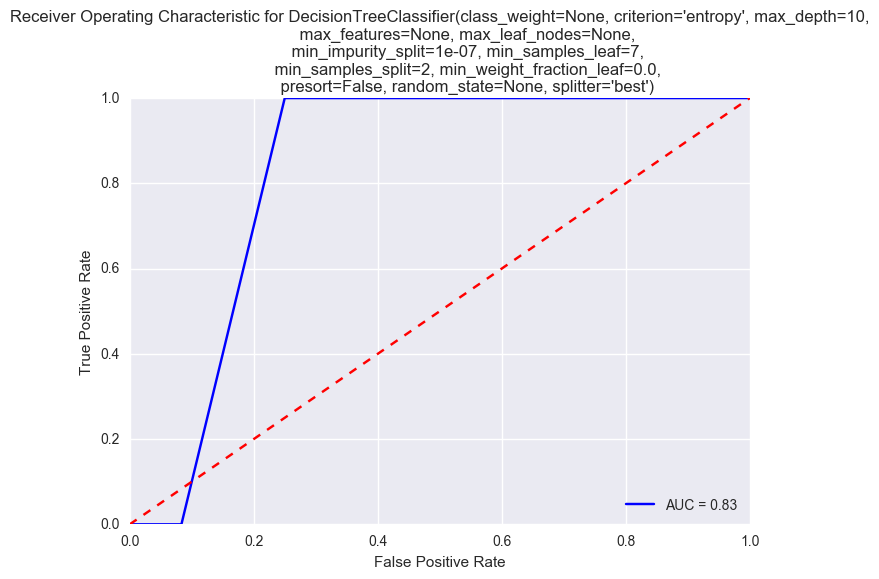

In [34]:
# Create and test the Decision Tree classifier with Tuned parameters
clf_DTTuned = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=7)

tester.dump_classifier_and_data(clf_DTTuned, my_dataset, my_feature_list)
tester.main()

plt_ROC(clf_DTTuned)

# Conclusions 

The results are still relatively high given the nature of the persons of interest identification task.
The main takeaway from this project was the important of quality data as compared to fine-tuning the algorithm. 

Feature engineering, through the creation of new features and the selection of those with the greatest score
Tuning the hyperparameters of the algorithm help to increased score.

Subsequently, when developing future machine learning models, I will focus on collecting as much high-quality data 
as I can before I even think about training and tuning the algorithm. 


